Points in $ \mathbb{P}^2 $ are represented as

$$ \mathbf{x} = \begin{bmatrix}
x & y & w
\end{bmatrix}^T
$$


Lines are represented as

$$
\mathbf{x}^T\mathbf{l} = 0
$$

Where 

$$ \mathbf{l} = \begin{bmatrix}
a & b & c
\end{bmatrix}^T
$$


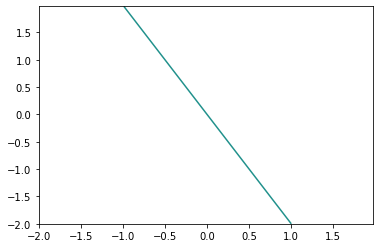

In [56]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def homogenous(euclidian):
    return np.vstack((euclidian, np.ones((1, euclidian.shape[1]))))

def plot_implicit(f, xrange, yrange, delta=0.025):
    xr = np.arange(*xrange, delta)
    yr = np.arange(*yrange, delta)
    xx, yy = np.meshgrid(xr, yr)

    x = homogenous(np.vstack((xx.ravel(), yy.ravel())))
    values = f(x)

    plt.contour(xr, yr, np.reshape(values, (len(xr), len(yr))), 0)
    plt.show()

l = np.array([2, 1, 0]) * 2
plot_implicit(lambda x: np.dot(x.T, l), (-2, 2), (-2, 2))



### Null space

In [65]:
from numpy.linalg import svd

def nullspace(A, atol=1e-13, rtol=0):
    A = np.atleast_2d(A)
    u, s, vh = svd(A)
    tol = max(atol, rtol * s[0])
    nnz = (s >= tol).sum()
    ns = vh[nnz:].conj().T
    return ns

A = np.array([[1, 0],
              [0, 1]])
print(nullspace(A))

A = np.array([[1, 0],
              [0, 0]])
n = nullspace(A)
print(n)
print(np.dot(A, n))
k = 17
print(np.dot(A, k * n))


[]
[[0.]
 [1.]]
[[0.]
 [0.]]
[[0.]
 [0.]]


### Conics

A "concic" is a quadratic on the form

$$ax^2 + bxy + cy^2 + dx + ey + f = 0$$

Using
$$ \mathbf{C} = \begin{bmatrix}
 a  & b/2 & d/2 \\
b/2 &  c  & e/2 \\
d/2 & e/2 &  f  \\
\end{bmatrix}
$$

It can be written just $\mathbf{x}^T\mathbf{Cx} = 0$

To compute a conic from 5 points we can use the first equation

$$
\begin{bmatrix}
x_1^2 & x_1y_1 & y_1^2 & x_1 & y_1 & 1 \\
x_2^2 & x_2y_2 & y_2^2 & x_2 & y_2 & 1 \\
x_3^2 & x_3y_3 & y_3^2 & x_3 & y_3 & 1 \\
x_4^2 & x_4y_4 & y_4^2 & x_4 & y_4 & 1 \\
x_5^2 & x_5y_5 & y_5^2 & x_5 & y_5 & 1 \\
\end{bmatrix}
= 
\begin{bmatrix}
a \\ b \\ c \\ d \\ e \\ f
\end{bmatrix}
$$

[[ 0.00742068]
 [-0.0065102 ]
 [ 0.01209238]
 [-0.13498252]
 [-0.12408608]
 [ 0.98292354]]


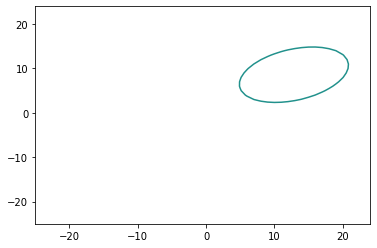

In [58]:
import numpy as np

def conic(xx, v):
    a, b, c, d, e, f = v.ravel()
    x, y, w = xx
    A = np.vstack((x**2, x*y, y**2, x, y, w)).T
    return np.dot(A, v)

points = np.array([
    [ 5.53679211,  4.26576703],
    [15.12532258,  3.55924373],
    [20.57564516,  9.11049821],
    [18.55700717, 14.25802509],
    [ 9.37220430, 12.94591039]]).T

x, y = points
A = np.vstack((x**2, x*y, y**2, x, y, np.ones(5))).T
c = nullspace(A)
print(c)

plot_implicit(lambda x: conic(x, c), (-25, 25), (-25, 25), delta=1)



<IPython.core.display.Javascript object>


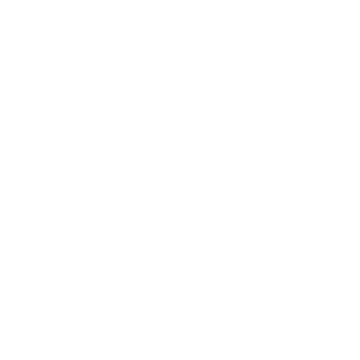

<IPython.core.display.Javascript object>


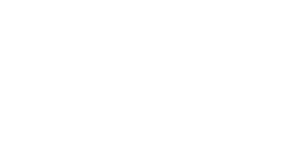

In [43]:
%matplotlib notebook
from matplotlib import pyplot as plt
from PIL import Image

#collector = []
def onclick(event):
    #global i, collector
    #collector.append((event.xdata, event.ydata))
    # Open the annotations file to continue to write
    with open('annotation.txt', 'a') as target:
        # Write picture and coordinates
        print((event.xdata, event.ydata), file=target)
    #i += 1
    #event.canvas.figure.clear()
    #event.canvas.figure.gca().imshow(images[i])

img = Image.open('data/0.jpeg')

fig = plt.figure(figsize=(5,5))
fig.canvas.mpl_connect('button_press_event', onclick)

plt.imshow(img)
plt.show()


